In [1]:
import sys
sys.path.append("./../common/")
from utils import *
from config import *

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [2]:
N = 10
K = 10
m, c = 2, 1
sd = 1

x = np.arange(0, N).reshape(-1, 1)
y = (m * x) + c
y_noisy = (m * (x + np.random.normal(0, sd, N).reshape(-1, 1))) + c

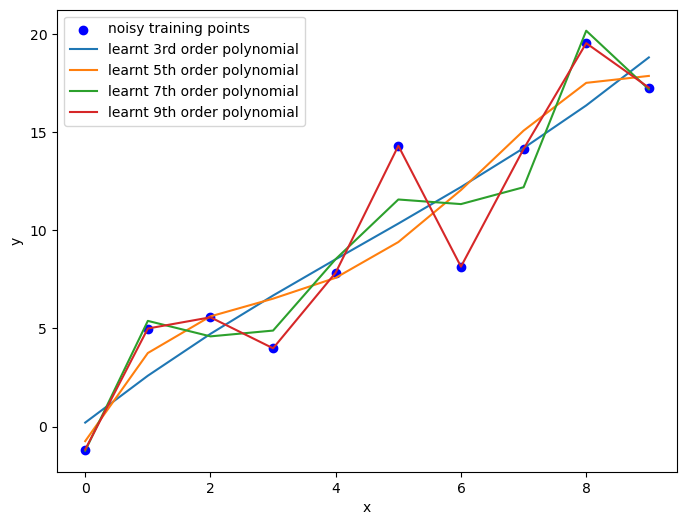

In [3]:
fig = plt.figure()
plt.scatter(x, y_noisy, c = "blue", label='noisy training points')

for i in range(3,11,2):
    model = make_pipeline(PolynomialFeatures(i),LinearRegression())
    model.fit(x, y_noisy)
    noisy_prediction = model.predict(x)
    ordinal = 'rd' if i == 3 else 'th'
    plt.plot(x, noisy_prediction, label='learnt {}{} order polynomial'.format(i, ordinal))

save_xy_graph(fig, "x", "y", figures_dir, 'model_unc_regression1.png')

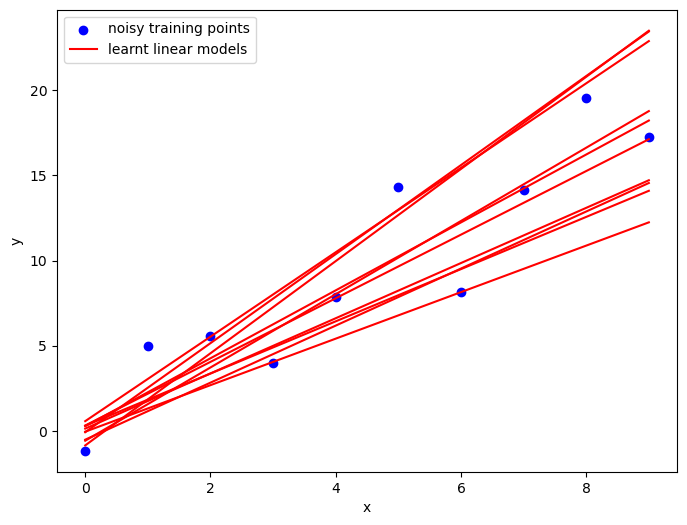

In [4]:
fig = plt.figure()
plt.scatter(x, y_noisy, c = "blue", label='noisy training points')

for i in range(K):
    model = SGDRegressor(eta0=0.07)
    model.fit(x, y_noisy.flatten())
    noisy_prediction = model.predict(x)
    plt.plot(x, noisy_prediction, c = "red")
plt.plot([], [], c = "red", label='learnt linear models')

save_xy_graph(fig, "x", "y", figures_dir, 'model_unc_regression2.png')